# PCA

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [20]:
genes = ['gene'+str(i) for i in range(1,101)]

In [21]:
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [22]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [23]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    

In [24]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,3789,3757,3806,3816,3803,4954,4815,4891,4806,4940
gene2,8609,8660,8866,8700,8617,5591,5661,5647,5610,5669
gene3,7922,7917,7797,7867,7649,8230,8130,8132,8141,8156
gene4,8268,8381,8622,8522,8520,2802,2734,2773,2700,2800
gene5,38,31,33,24,44,8493,8453,8510,8409,8466


In [25]:
data.shape

(100, 10)

# 🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️

In [26]:
scaled_data = preprocessing.scale(data.T)

# ===××××===

In [27]:
pca = PCA()

In [28]:
pca.fit(scaled_data)

PCA()

In [29]:
pca_data = pca.transform(scaled_data)

In [30]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

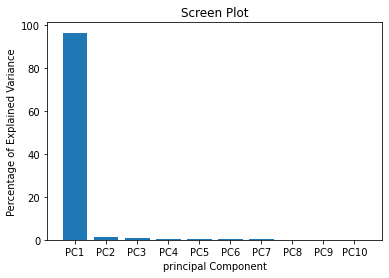

In [31]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()

In [32]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

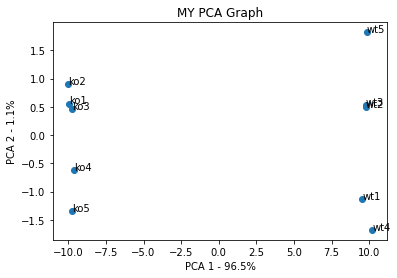

In [33]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("MY PCA Graph")
plt.xlabel(f"PCA 1 - {per_var[0]}%")
plt.ylabel(f"PCA 2 - {per_var[1]}%")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# With out Transposing data

In [44]:
scaled_data = preprocessing.scale(data)

In [45]:
pca = PCA()
pca.fit(scaled_data)

PCA()

# 🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️

In [46]:
pca_data = pca.transform(scaled_data)

# ===××××===

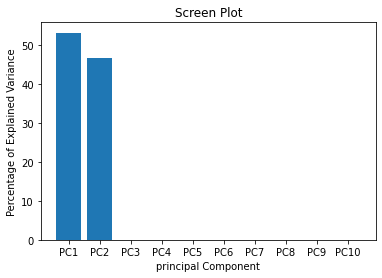

In [47]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()

# Mnist data



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data_load = pd.read_csv("digit.csv")

In [4]:
data_load.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
label = data_load['label'].head(1500)
data = data_load.drop("label", axis=1).head(1500)

In [17]:
data.head(4)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(label.shape)
print(data.shape)

(1500,)
(1500, 784)


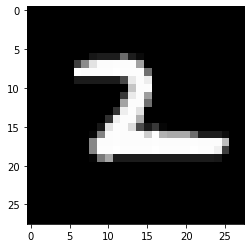

2


In [7]:
location = 44
grid = data.iloc[location].to_numpy().reshape(28,28)
plt.imshow(grid, cmap='gray')
plt.show()
print(label[location])

In [8]:
standardized_data = StandardScaler().fit_transform(data)

In [15]:
print(standardized_data.shape)

(1500, 784)


In [19]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("shape of cov matrix is ", covar_matrix.shape)

shape of cov matrix is  (784, 784)


In [20]:
from scipy.linalg import eigh

In [21]:
values, vectors = eigh(covar_matrix, eigvals=(782, 783))

In [26]:
vectors = vectors.T
vectors.shape

(2, 784)

In [31]:
import matplotlib.pyplot as plt

new_coordinates = np.matmul(vectors, sample_data.T)
print(vectors.shape, sample_data.T.shape, "= 2, 1500")

(2, 784) (784, 1500) = 2, 1500


In [36]:
new_coordinates = np.vstack((new_coordinates, label)).T

In [69]:
dataFrame = pd.DataFrame(data= new_coordinates, columns=("1st principal", "2nd principal", "label"))

In [70]:
print(dataFrame.head(4))

1st principal  2nd principal  label
0      -5.677420      -5.092273    1.0
1       2.937531      18.990336    0.0
2      -2.559668      -7.678245    1.0
3       0.084677      -0.842054    4.0


In [71]:
import seaborn as sn

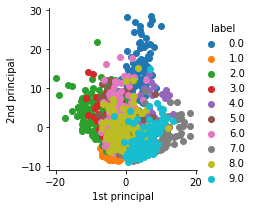

In [78]:
sn.FacetGrid(dataFrame, hue='label').map(plt.scatter, '1st principal', '2nd principal').add_legend()
plt.show()

# sklearn pca

In [79]:
pca = PCA()

In [80]:
pca.n_components = 2

In [81]:
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(1500, 2)

In [82]:
pca_data = np.vstack((pca_data.T, label)).T

In [83]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st principal", "2nd Principal", "label"))

In [97]:
pca_df.isna();

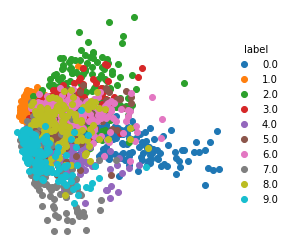

In [102]:
sn.FacetGrid(pca_df, hue='label', size=4).map(plt.scatter, '1st principal', '2nd Principal').add_legend()
plt.axis("off")
plt.show()